# Traffic Sign Classification

Traffic sign classification is an important task for self driving cars.  
In this project, a Deep Network known as LeNet will be used for traffic sign images classification.  
The dataset contains 43 different classes of images.  

Classes are as listed below:

0 - Speed limit (20km/h)  
1 - Speed limit (30km/h)  
2 - Speed limit (50km/h)  
3 - Speed limit (60km/h)  
4 - Speed limit (70km/h)  
5 - Speed limit (80km/h)  
6 - End of speed limit (80km/h)  
7 - Speed limit (100km/h)  
8 - Speed limit (120km/h)  
9 - No passing  
10 - No passing for vehicles over 3.5 metric tons  
11 - Right-of-way at the next intersection  
12 - Priority road  
13 - Yield  
14 - Stop  
15 - No vehicles    
16 - Vehicles over 3.5 metric tons prohibited  
17 - No entry  
18 - General caution   
19 - Dangerous curve to the left  
20 - Dangerous curve to the right  
21 - Double curve  
22 - Bumpy road  
23 - Slippery road  
24 - Road narrows on the right  
25 - Road work  
26 - Traffic signals  
27 - Pedestrians  
28 - Children crossing  
29 - Bicycles crossing  
30 - Beware of ice/snow  
31 - Wild animals crossing  
32 - End of all speed and passing limits  
33 - Turn right ahead  
34 - Turn left ahead  
35 - Ahead only  
36 - Go straight or right  
37 - Go straight or left  
38 - Keep right  
39 - Keep left  
40 - Roundabout mandatory  
41 - End of no passing  
42 - End of no passing by vehicles over 3.5 metric tons  

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
%matplotlib inline

## Load Dataset

In [3]:
with open("dataset/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("dataset/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("dataset/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
print(f'Training {X_train.shape}')
print(f'Testing {X_test.shape}')
print(f'Validating {X_validation.shape}')

Training (34799, 32, 32, 3)
Testing (12630, 32, 32, 3)
Validating (4410, 32, 32, 3)


In [6]:
with open("class-label-names.txt") as file_in:
    lines = {}
    for line in file_in:
        class_label = line.split('-')[0].strip()
        class_name = line.split('-')[1].split('\n')[0].strip()
        lines[int(class_label)] = class_name

In [8]:
file_to_store = open("labels.pickle", "wb")
pickle.dump(lines, file_to_store)

## Image Exploration

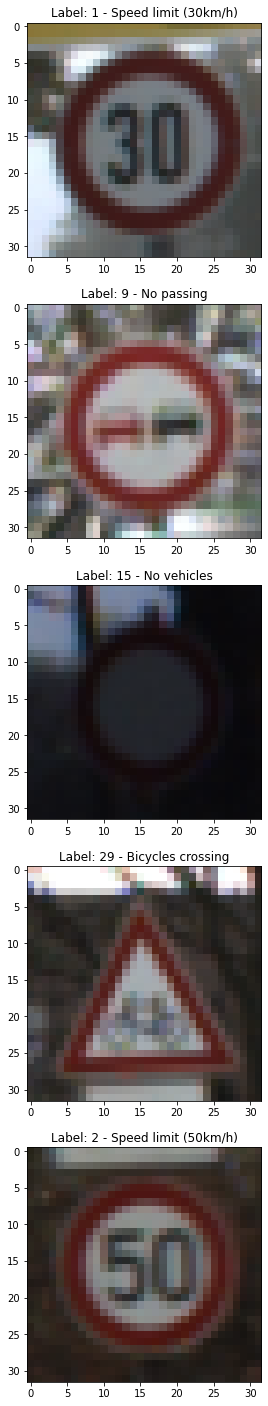

In [10]:
import random

fig, axs = plt.subplots(5, figsize=(25, 25))

# plt.figure()

for sub in range(0, 5):
    index = random.randint(1, 34799)
    axs[sub].imshow(X_train[index])
    axs[sub].set_title(f'Label: {y_train[index]} - {lines[y_train[index]]}')

## Data Preperation

In [11]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [12]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True) 

In [14]:
X_train_gray.shape

(34799, 32, 32, 1)

In [15]:
X_train_gray_norm = (X_train_gray - 128)/128 
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

## Model Training

In [16]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam # - Works
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [18]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))


In [19]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [20]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=2,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/2
70/70 [==============================] - 4s 8ms/step - loss: 3.2433 - accuracy: 0.1637 - val_loss: 2.7794 - val_accuracy: 0.2658
Epoch 2/2
70/70 [==============================] - 0s 5ms/step - loss: 1.7778 - accuracy: 0.5110 - val_loss: 1.4632 - val_accuracy: 0.5853


In [107]:
# model_json = cnn_model.to_json()
# with open("model.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# cnn_model.save_weights("model.h5")
# print("Saved model to disk")

Saved model to disk


## Model Evaluation

In [108]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.9180


In [110]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

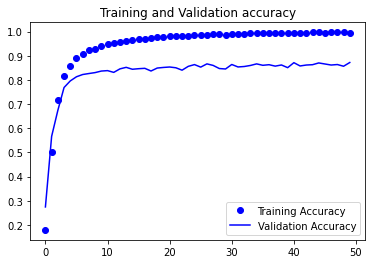

In [132]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

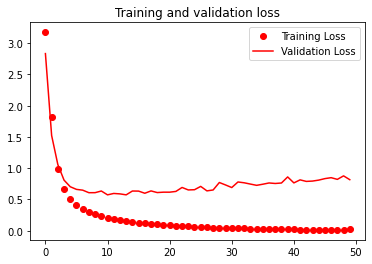

In [133]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Model Testing

In [113]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(X_test_gray_norm)
#get the indices to be plotted
y_true = y_test

C:\Users\Eashan\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

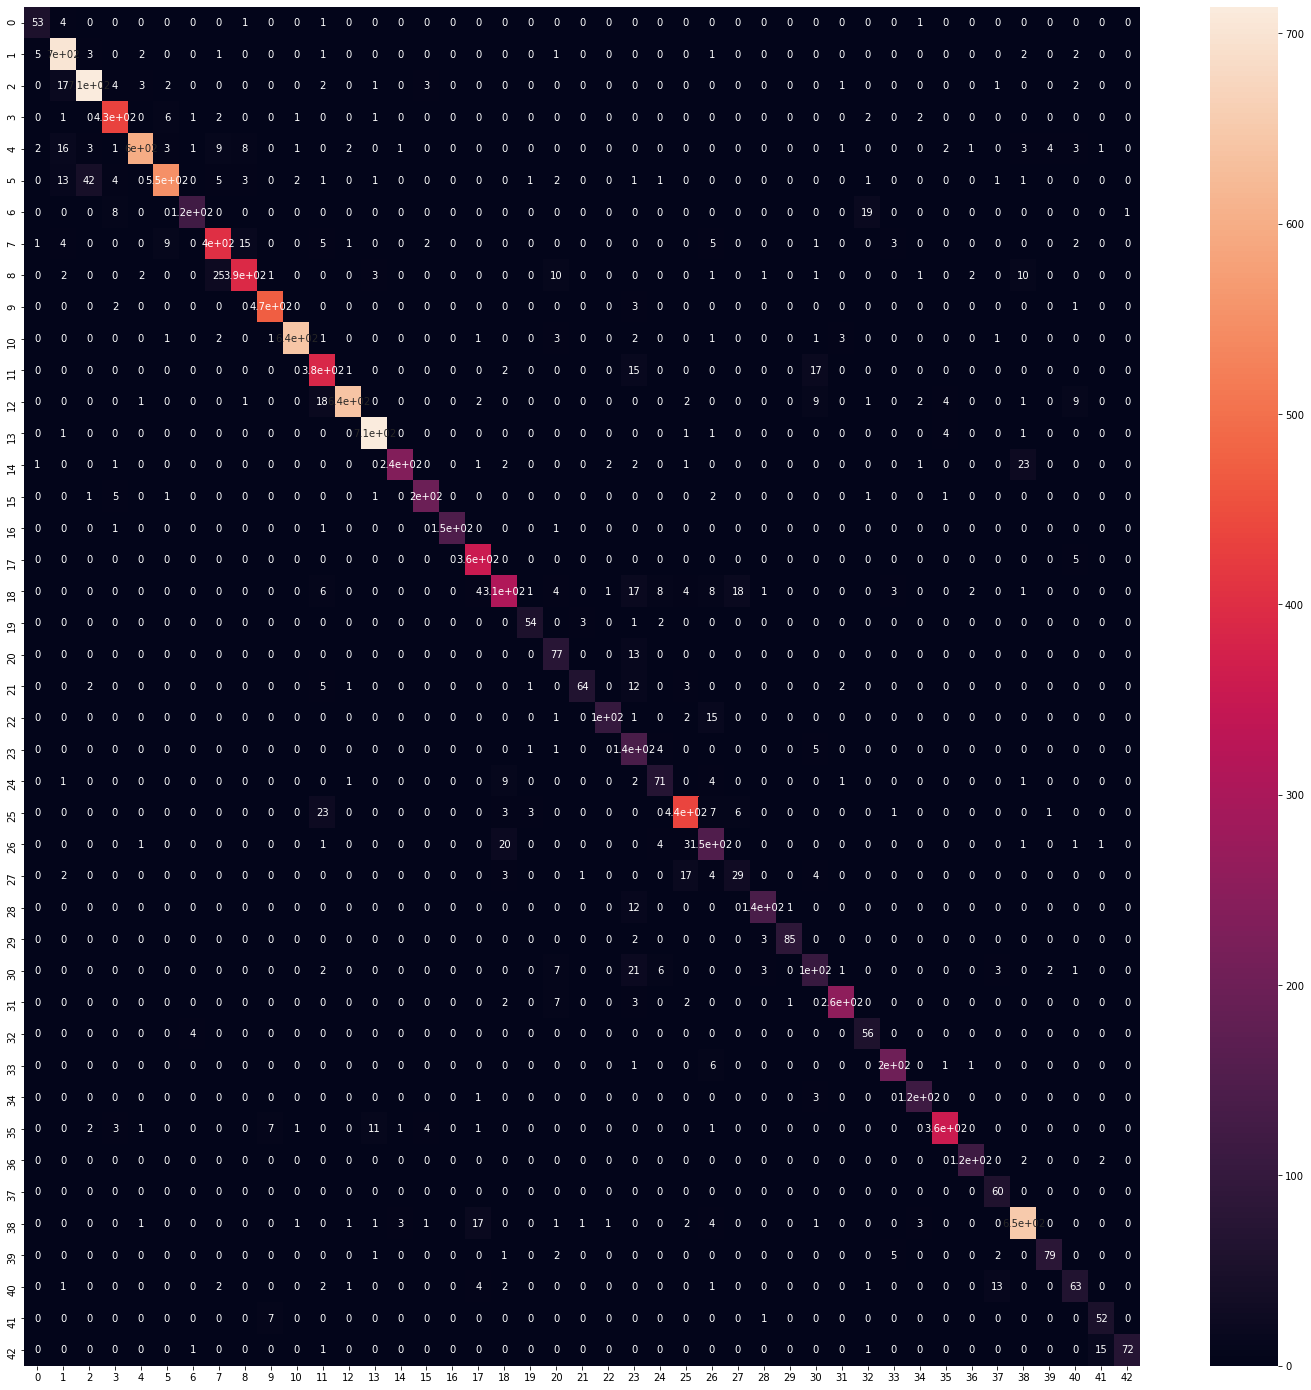

In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

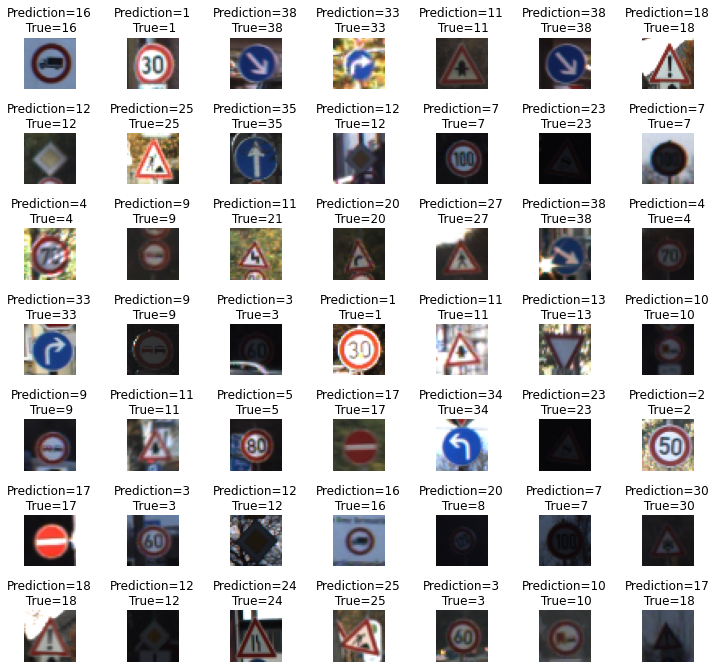

In [115]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() # 

for i in np.arange(0, L * W):  
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)

## Single Class Prediction

In [33]:
from tensorflow.keras.models import load_model
from pickle import load
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
import pickle

In [36]:
MODEL_WEIGHT_PATH = 'model.h5'
MODEL_PATH = 'model.json'
CLASS_LABEL_PATH = 'labels.pickle'

In [37]:
json_file = open(MODEL_PATH, 'r')
loaded_model_json = json_file.read()
json_file.close()
    
loaded_model = model_from_json(loaded_model_json)
    
# load weights into new model
loaded_model.load_weights(MODEL_WEIGHT_PATH)
    
print("Loaded model from disk")

Loaded model from disk


In [39]:
file_to_read = open(CLASS_LABEL_PATH, "rb")
labels = pickle.load(file_to_read)

In [50]:
from tensorflow.keras.preprocessing import image

In [57]:
img = image.load_img('upload.png', target_size=(32, 32))
img = np.array(img)
img = np.expand_dims(img, axis=0)
img = np.sum(img/3, axis=3, keepdims=True)
img = (img - 128)/128

In [58]:
y_pred = loaded_model.predict(img)

In [59]:
labels[np.argmax(y_pred)]

'Speed limit (30km/h)'